In [67]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('merge.csv', encoding='cp949')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['연도', '구', '동명','위도','경도'], axis=1)
df

,주정차 단속건수,주차장 개수,주차장 면적,민영 개수,민영 면적,공영 개수,공영 면적,노상 개수,노상 면적,노외 개수,노외 면적
0,1699,280,7179,834,6875,2,304,2,304,2,65
1,2533,119,6206,1129,5677,3,529,1,339,5,217
2,388,37,5569,259,5391,1,178,1,178,0,0
3,3708,169,7409,829,7130,1,279,1,279,1,63
4,2940,701,7720,1305,7510,1,210,1,210,1,18
...,...,...,...,...,...,...,...,...,...,...,...
82,157,25,4957,0,0,26,9410,0,0,1,22
83,609,68,22043,0,0,74,28079,0,0,1,11
84,26358,853,22569,50,2408,2008,74206,39,757,11,1651
85,2626,473,9953,21,1301,864,16956,20,938,1,363


In [69]:
df.dtypes

주정차 단속건수     int64
주차장 개수       int64
주차장 면적      object
민영 개수       object
민영 면적       object
공영 개수        int64
공영 면적       object
노상 개수        int64
노상 면적       object
노외 개수        int64
노외 면적        int64
dtype: object

In [70]:
cols = df.columns

for col in cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].apply(lambda x: x.replace(',',''))
    df[col] = df[col].astype(int)

df.dtypes

주정차 단속건수    int32
주차장 개수      int32
주차장 면적      int32
민영 개수       int32
민영 면적       int32
공영 개수       int32
공영 면적       int32
노상 개수       int32
노상 면적       int32
노외 개수       int32
노외 면적       int32
dtype: object

In [71]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# 데이터 시각화를 위한 폰트설정
plt.rc("font", family="Malgun Gothic")

plt.rcParams['axes.unicode_minus'] = False

<AxesSubplot:>

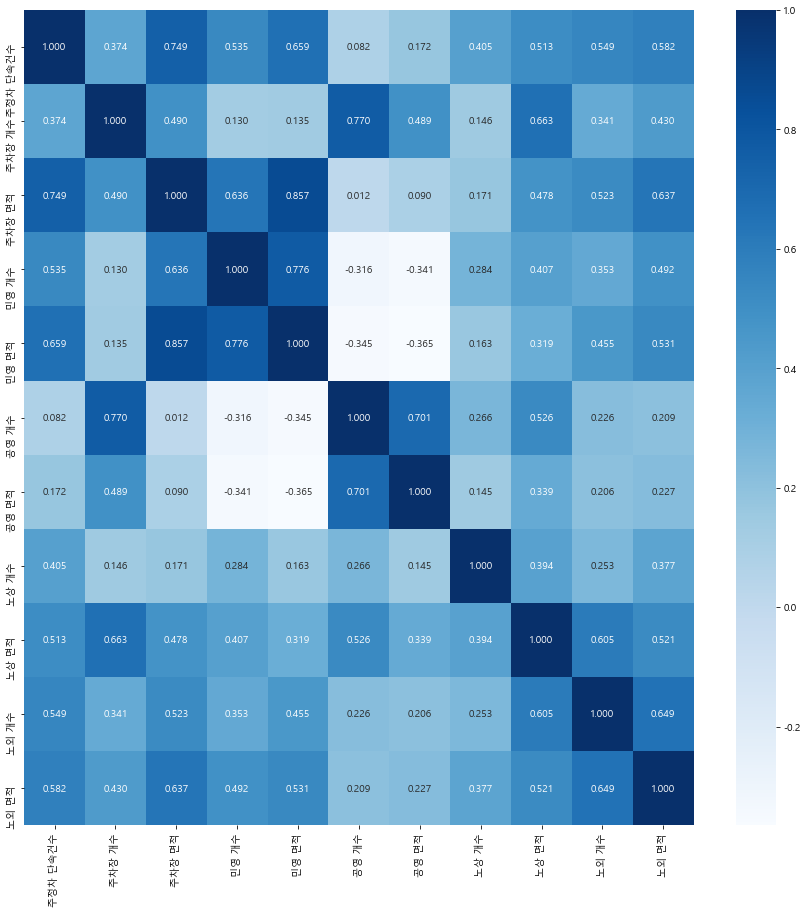

In [72]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, fmt='.3f',cmap='Blues')

<AxesSubplot:xlabel='주차장 면적', ylabel='주정차 단속건수'>

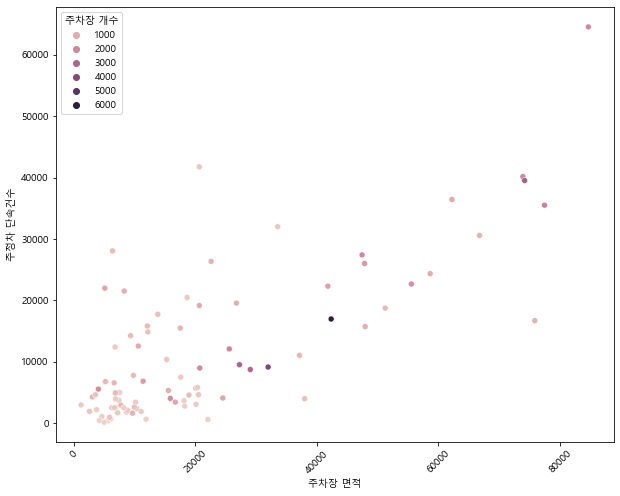

In [73]:
import seaborn as sns

plt.figure(figsize=(10,8))
plt.xticks(rotation=45)

sns.scatterplot(data=df,x='주차장 면적', y='주정차 단속건수',hue='주차장 개수')

<AxesSubplot:xlabel='민영 면적', ylabel='주정차 단속건수'>

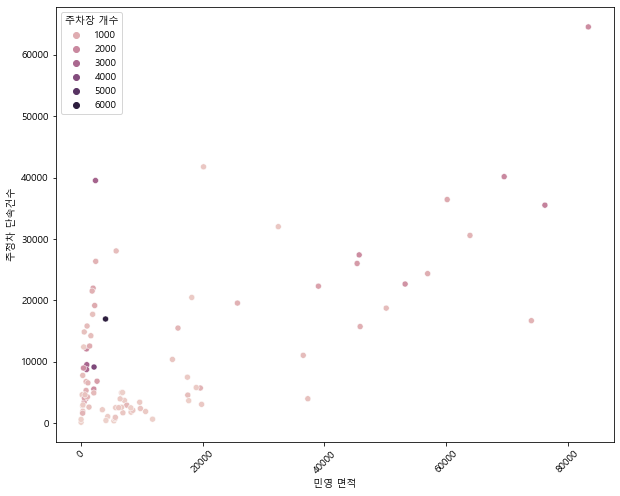

In [74]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)

sns.scatterplot(data=df,x='민영 면적', y='주정차 단속건수',hue='주차장 개수')

<AxesSubplot:xlabel='노상 면적', ylabel='주정차 단속건수'>

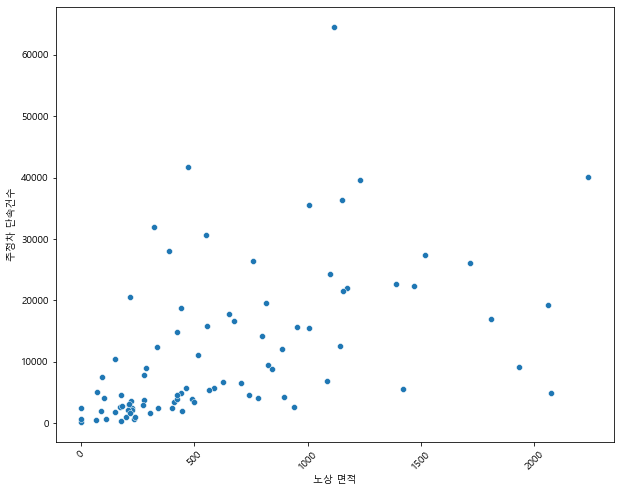

In [75]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)

sns.scatterplot(data=df,x='노상 면적', y='주정차 단속건수')

<AxesSubplot:xlabel='노외 면적', ylabel='주정차 단속건수'>

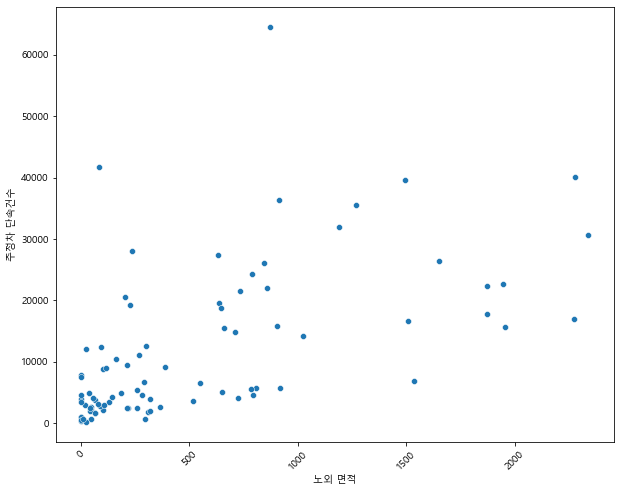

In [76]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)

sns.scatterplot(data=df,x='노외 면적', y='주정차 단속건수')

In [77]:
# sns.pairplot(df)

# 회귀 분석

## 다중공선성 평가

이번에는 변수의 다중공선성을 확인하는 방법 중 하나인 VIF(Variance Inflation Factors, 분산팽창요인) 

VIF는 변수간의 다중공선성을 진단하는 수치이며 범위 1부터 무한대입니다.

통계학에서는 VIF 값이 10이상이면 해당 변수가 다중공선성이 잇는 것으로 판단 합니다.

In [78]:
x_cols = cols[1:]

X = df[x_cols]
y = df[['주정차 단속건수']]

In [79]:
mean  = np.mean(X,axis=0)
std   = np.std(X,axis=0)
X_scaled = (X-mean)/std
X_scaled

,주차장 개수,주차장 면적,민영 개수,민영 면적,공영 개수,공영 면적,노상 개수,노상 면적,노외 개수,노외 면적
0,-0.590328,-0.703181,-0.095678,-0.378061,-0.629309,-0.662887,-0.454306,-0.635437,-0.775188,-0.756343
1,-0.758299,-0.751109,0.106045,-0.435888,-0.628430,-0.646980,-0.462787,-0.568966,-0.435147,-0.508729
2,-0.843850,-0.782487,-0.488865,-0.449693,-0.630188,-0.671796,-0.462787,-0.874733,-1.001881,-0.862231
3,-0.706134,-0.691852,-0.099097,-0.365752,-0.630188,-0.664655,-0.462787,-0.682917,-0.888535,-0.759601
4,-0.151099,-0.676533,0.226394,-0.347410,-0.630188,-0.669533,-0.462787,-0.813960,-0.888535,-0.832908
...,...,...,...,...,...,...,...,...,...,...
82,-0.856370,-0.812633,-0.665970,-0.709913,-0.608216,-0.019091,-0.471269,-1.212786,-0.888535,-0.826392
83,-0.811508,0.028993,-0.665970,-0.709913,-0.566029,1.300813,-0.471269,-1.212786,-0.888535,-0.844311
84,0.007483,0.054903,-0.631780,-0.593680,1.133755,4.562004,-0.140484,0.224888,0.244933,1.827316
85,-0.388971,-0.566539,-0.651610,-0.647114,0.128299,0.514414,-0.301636,0.568639,-0.888535,-0.270889


In [80]:
# train 데이터의 VIF 계수 출력

from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

vif["features"] = X_scaled.columns 

vif = vif.sort_values('VIF Factor').reset_index(drop=True)

vif


,VIF Factor,features
0,1.830275,노상 개수
1,2.469113,노외 개수
2,2.716785,노외 면적
3,3.805679,노상 면적
4,4.220398,민영 개수
5,7.486523,공영 면적
6,11.981551,주차장 개수
7,12.185730,공영 개수
8,28.573928,주차장 면적
9,29.331047,민영 면적


In [81]:
# 민영 면적 제거

x_cols = x_cols.drop('민영 면적')

X_scaled = X_scaled[x_cols]
X_scaled

,주차장 개수,주차장 면적,민영 개수,공영 개수,공영 면적,노상 개수,노상 면적,노외 개수,노외 면적
0,-0.590328,-0.703181,-0.095678,-0.629309,-0.662887,-0.454306,-0.635437,-0.775188,-0.756343
1,-0.758299,-0.751109,0.106045,-0.628430,-0.646980,-0.462787,-0.568966,-0.435147,-0.508729
2,-0.843850,-0.782487,-0.488865,-0.630188,-0.671796,-0.462787,-0.874733,-1.001881,-0.862231
3,-0.706134,-0.691852,-0.099097,-0.630188,-0.664655,-0.462787,-0.682917,-0.888535,-0.759601
4,-0.151099,-0.676533,0.226394,-0.630188,-0.669533,-0.462787,-0.813960,-0.888535,-0.832908
...,...,...,...,...,...,...,...,...,...
82,-0.856370,-0.812633,-0.665970,-0.608216,-0.019091,-0.471269,-1.212786,-0.888535,-0.826392
83,-0.811508,0.028993,-0.665970,-0.566029,1.300813,-0.471269,-1.212786,-0.888535,-0.844311
84,0.007483,0.054903,-0.631780,1.133755,4.562004,-0.140484,0.224888,0.244933,1.827316
85,-0.388971,-0.566539,-0.651610,0.128299,0.514414,-0.301636,0.568639,-0.888535,-0.270889


In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

vif["features"] = X_scaled.columns 

vif = vif.sort_values('VIF Factor').reset_index(drop=True)

vif


,VIF Factor,features
0,1.830202,노상 개수
1,2.448870,노외 개수
2,2.514824,공영 면적
3,2.622421,노외 면적
4,3.547223,노상 면적
5,4.121380,민영 개수
6,4.279632,주차장 면적
7,9.285515,주차장 개수
8,11.780601,공영 개수


In [83]:
# 공영 개수 제거

x_cols = x_cols.drop('공영 개수')

X_scaled = X_scaled[x_cols]

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

vif["features"] = X_scaled.columns 

vif = vif.sort_values('VIF Factor').reset_index(drop=True)

vif


,VIF Factor,features
0,1.370118,노상 개수
1,2.060367,공영 면적
2,2.362682,노외 개수
3,2.622248,노외 면적
4,2.756840,주차장 개수
5,2.986966,주차장 면적
6,3.302111,민영 개수
7,3.430546,노상 면적


In [85]:
X = X.drop(['민영 면적','공영 개수'],axis =1)
X

,주차장 개수,주차장 면적,민영 개수,공영 면적,노상 개수,노상 면적,노외 개수,노외 면적
0,280,7179,834,304,2,304,2,65
1,119,6206,1129,529,1,339,5,217
2,37,5569,259,178,1,178,0,0
3,169,7409,829,279,1,279,1,63
4,701,7720,1305,210,1,210,1,18
...,...,...,...,...,...,...,...,...
82,25,4957,0,9410,0,0,1,22
83,68,22043,0,28079,0,0,1,11
84,853,22569,50,74206,39,757,11,1651
85,473,9953,21,16956,20,938,1,363


## 분석

In [86]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [93]:
mean_train    = np.mean(X_train,axis=0)
std_train     = np.std(X_train,axis=0)
X_train_scaled = (X_train-mean_train)/std_train


mean_test     = np.mean(X_test,axis=0)
std_test      = np.std(X_test,axis=0)
X_test_scaled = (X_test-mean_test)/std_test

In [94]:
X_train_scaled

,주차장 개수,주차장 면적,민영 개수,공영 면적,노상 개수,노상 면적,노외 개수,노외 면적
40,2.147885,0.325555,-0.631575,1.945902,-0.501047,0.380059,-0.715805,-0.467252
28,-0.114625,-0.173641,0.164187,-0.628356,-0.489824,0.727104,0.248492,0.234611
9,-0.620996,-0.719452,0.218616,-0.773075,-0.523492,-0.884728,-0.836342,-0.734402
66,-0.294842,-0.591787,-0.482757,1.686739,1.855704,0.326074,0.127955,0.810012
5,-0.579860,-0.549881,0.304737,-0.738638,-0.523492,-0.418145,0.007418,-0.600037
...,...,...,...,...,...,...,...,...
20,-0.535785,-0.618395,0.216549,-0.761111,-0.534715,-0.815319,-0.715805,-0.644298
60,0.601347,1.379261,2.067126,-0.533784,2.046489,2.094077,0.851177,0.527054
71,-0.369280,-0.446623,-0.509627,1.370353,1.485358,-0.393081,-0.354194,0.318392
14,-0.597490,-0.503113,0.097357,-0.744360,-0.534715,-0.352592,-0.474731,-0.739145


In [96]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled,y_train)

r_square = lr.score(X_test_scaled,y_test)
print('R-square: ', r_square)
print('\n')

print('X 변수의 기울기: ', lr.coef_)
print('\n')

print('절편: ',lr.intercept_)


R-square:  0.5328157819212846


X 변수의 기울기:  [[  -19.36295655  7745.98216119  -543.17679011  -797.95877767
   3806.02536445    26.05224807  1478.19500835 -1105.46629608]]


절편:  [10735.44615385]


In [98]:
import statsmodels.api as sm

x_train_new = sm.add_constant(X_train_scaled)
x_test_new = sm.add_constant(X_test_scaled)

In [100]:
multi_model = sm.OLS(y_train,x_train_new).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:               주정차 단속건수   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     13.26
Date:                Wed, 17 Nov 2021   Prob (F-statistic):           1.60e-10
Time:                        03:02:26   Log-Likelihood:                -666.19
No. Observations:                  65   AIC:                             1350.
Df Residuals:                      56   BIC:                             1370.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.074e+04    913.630     11.750      0.0

In [99]:
multi_model = sm.OLS(y_test,x_test_new).fit()
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:               주정차 단속건수   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     5.617
Date:                Wed, 17 Nov 2021   Prob (F-statistic):            0.00320
Time:                        03:02:24   Log-Likelihood:                -223.32
No. Observations:                  22   AIC:                             464.6
Df Residuals:                      13   BIC:                             474.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.41e+04   1718.869      8.205      0.0

In [105]:
model1 = sm.OLS(y,X).fit().summary()
model1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               주정차 단속건수   R-squared (uncentered):                   4.160
Model:                            OLS   Adj. R-squared (uncentered):              4.480
Method:                 Least Squares   F-statistic:                             -13.00
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                        1.00
Time:                        03:14:16   Log-Likelihood:                         -893.55
No. Observations:                  87   AIC:                                      1803.
Df Residuals:                      79   BIC:                                      1823.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
주차장 개수        -1.2397      1.358     -0.913      0.364      -3.943       1.463
주차장 면적         0.3734      0.065      5.717      0.000       0.243       0.503
민영 개수          0.5778      0.975      0.593      0.555      -1.363       2.519
공영 면적          0.0967      0.078      1.241      0.218      -0.058       0.252
노상 개수         24.1971      7.804      3.101      0.003       8.664      39.730
노상 면적          1.0993      2.685      0.409      0.683      -4.246       6.445
노외 개수        191.1274    136.344      1.402      0.165     -80.258     462.512
노외 면적         -0.9367      2.067     -0.453      0.652      -5.051       3.178
==============================================================================
Omnibus:                       52.257   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.022
Skew:                           1.976   Prob(JB):                     2.01e-42
Kurtosis:                       9.112   Cond. No.                     5.37e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 상수없이

model1 = sm.OLS(y,X).fit().summary()
model1